In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1、输出5*5矩阵

In [2]:
A = np.eye(5)
A

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

### 2、根据城市人口数量，预测开小吃店的利润 数据在ex1data1.txt里，第一列是城市人口数量，第二列是该城市小吃店利润。
* 2.1 Plotting the data

In [3]:
path = "./data/ex1data1.txt"
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


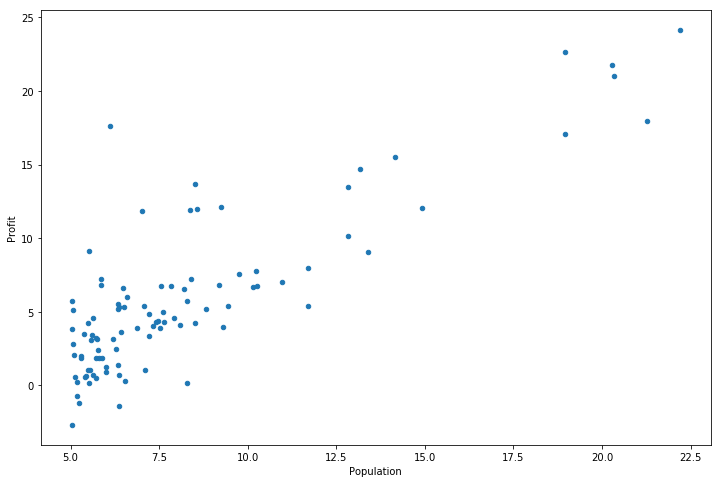

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12, 8))
plt.show()

* 2.2 梯度下降

$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$

In [5]:
def get_cost(X, y, theta):
    temp = np.power(((X * theta.T) - y), 2)
    return np.sum(temp) / (2 * len(X))

In [6]:
data.insert(0, 'Ones', 1)

In [7]:
cols = data.shape[1]
X = data.iloc[:,:-1]#X是data里的除最后列
y = data.iloc[:,cols-1:cols]#y是data最后一列

In [8]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [10]:
type(X)

pandas.core.frame.DataFrame

In [11]:
type(y)

pandas.core.frame.DataFrame

In [12]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [13]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [15]:
# 学习率初始化为0.01，迭代次数为1500次
def gradient_descent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = get_cost(X, y, theta)
        
    return theta, cost

![123](../../pic/QQ截图20201021192046.png)

In [14]:
get_cost(X, y, theta)

32.072733877455676

In [16]:
alpha = 0.01
iters = 1500

In [17]:
g, cost = gradient_descent(X, y, theta, alpha, iters)
g

matrix([[-3.63029144,  1.16636235]])

In [18]:
cost

array([ 6.73719046,  5.93159357,  5.90115471, ...,  4.48343473,
        4.48341145,  4.48338826])

In [19]:
predict1 = [1,3.5]*g.T
print("predict1:",predict1)
predict2 = [1,7]*g.T
print("predict2:",predict2)
# 预测35000和70000城市规模的小吃摊利润

predict1: [[ 0.45197679]]
predict2: [[ 4.53424501]]


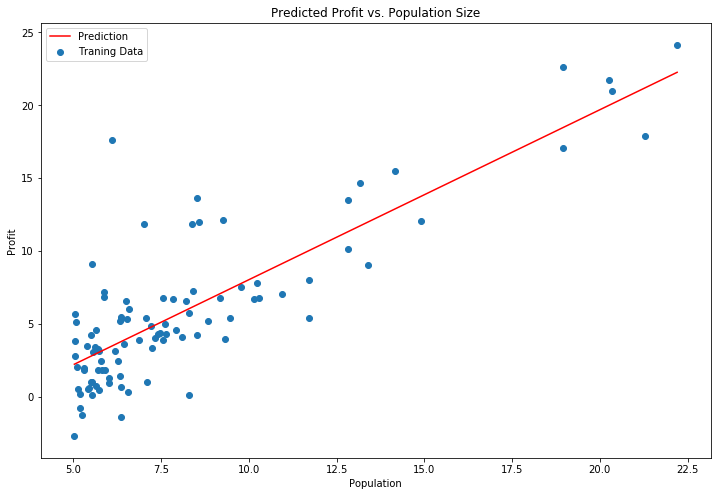

In [20]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()
# 原始数据以及拟合的直线

### 2.4 可视化$J(θ)$

In [21]:
path =  './data/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [22]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [23]:
# 加一列常数项
data2.insert(0, 'Ones', 1)

# 初始化X和y
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# 转换成matrix格式，初始化theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# 运行梯度下降算法
g2, cost2 = gradient_descent(X2, y2, theta2, alpha, iters)
g2

matrix([[ -1.10856950e-16,   8.84042349e-01,  -5.24551809e-02]])

In [24]:
# 正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return theta

In [25]:
final_theta2=normalEqn(X, y)#这里用的是data1的数据
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])